### Importación de librerias

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math

### Importar datos


In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/juantoro5/Analitica-para-RH-E7/main/consulta.csv", sep=",")
df

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,AñoEncu
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,NaN,2015
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,5,1,4,3.0,2.0,4.0,2,4,Yes,2015
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5,0,3,2.0,2.0,1.0,3,3,NaN,2015
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,NaN,2015
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,6,0,4,4.0,1.0,3.0,3,3,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,3,0,2,4.0,1.0,3.0,3,3,NaN,2016
8816,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,3,0,2,4.0,4.0,3.0,2,3,NaN,2016
8817,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,4,1,2,1.0,3.0,3.0,3,4,NaN,2016
8818,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,9,7,8,4.0,1.0,3.0,2,3,NaN,2016


In [106]:
df['AñoEncu'] = df['AñoEncu'].astype(object)

In [107]:
df1=df[df['AñoEncu']==2015]

In [108]:
df1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,AñoEncu
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,NaN,2015
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,5,1,4,3.0,2.0,4.0,2,4,Yes,2015
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5,0,3,2.0,2.0,1.0,3,3,NaN,2015
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,NaN,2015
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,6,0,4,4.0,1.0,3.0,3,3,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,3,0,2,4.0,1.0,3.0,3,3,NaN,2015
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,3,0,2,4.0,4.0,3.0,2,3,NaN,2015
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,4,1,2,1.0,3.0,3.0,3,4,NaN,2015
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,9,7,8,4.0,1.0,3.0,2,3,NaN,2015


In [109]:
df.shape

(8820, 30)

### Análisis exploratorio

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                   4410

In [111]:
df1['AñoEncu'] = df1['AñoEncu'].astype(object)

In [112]:
# Contar los valores nulos por columna
nulos_por_columna = df1.isnull().sum()

# Mostrar el resultado
print(nulos_por_columna)


Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked           19
Over18                        0
PercentSalaryHike             0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             9
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
EnvironmentSatisfaction      25
JobSatisfaction              20
WorkLifeBalance              38
JobInvolvement                0
PerformanceRating             0
Attrition                  3760
AñoEncu                       0
dtype: int64


Imputacion de nulos ('NumCompaniesWorked', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance')

In [113]:
# Imputación de las variables numéricas por la media
for column in ['NumCompaniesWorked', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']:
    df1[column].fillna(df1[column].mean(), inplace=True)

C:\Users\sebas\AppData\Local\Temp\ipykernel_18792\1194658092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(df1[column].mean(), inplace=True)


In [114]:
# Reemplazar 'Yes' por 1, 'No' por 0, y NaN por 0
df1['Attrition'].replace({'Yes': 1, 'No': 0, np.nan: 0}, inplace=True)

# Asegurarte de que 'Attrition' sea de tipo entero
df1['Attrition'] = df1['Attrition'].astype(int)

C:\Users\sebas\AppData\Local\Temp\ipykernel_18792\1875646843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Attrition'].replace({'Yes': 1, 'No': 0, np.nan: 0}, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_18792\1875646843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1

In [115]:
df1.head(10)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,AñoEncu
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,0,2015
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,5,1,4,3.0,2.0,4.0,2,4,1,2015
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5,0,3,2.0,2.0,1.0,3,3,0,2015
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,0,2015
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,6,0,4,4.0,1.0,3.0,3,3,0,2015
5,46,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,...,7,7,7,3.0,2.0,2.0,3,3,0,2015
6,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,0,0,0,1.0,3.0,1.0,3,4,1,2015
7,29,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,...,0,0,0,1.0,2.0,3.0,3,4,0,2015
8,31,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,...,9,7,8,2.0,4.0,3.0,3,4,0,2015
9,25,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,...,6,1,5,2.0,1.0,3.0,3,3,0,2015


In [116]:
df1.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition', 'AñoEncu'],
      dtype='object')

In [117]:
df1.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
Attrition           

In [118]:
#Definir variables númericas

df_num= numerical_vars = df1.select_dtypes(include=['number'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   DistanceFromHome         4410 non-null   int64  
 2   Education                4410 non-null   int64  
 3   EmployeeCount            4410 non-null   int64  
 4   EmployeeID               4410 non-null   int64  
 5   JobLevel                 4410 non-null   int64  
 6   MonthlyIncome            4410 non-null   int64  
 7   NumCompaniesWorked       4410 non-null   float64
 8   PercentSalaryHike        4410 non-null   int64  
 9   StandardHours            4410 non-null   int64  
 10  StockOptionLevel         4410 non-null   int64  
 11  TotalWorkingYears        4401 non-null   float64
 12  TrainingTimesLastYear    4410 non-null   int64  
 13  YearsAtCompany           4410 non-null   int64  
 14  YearsSinceLastPromotion  4410

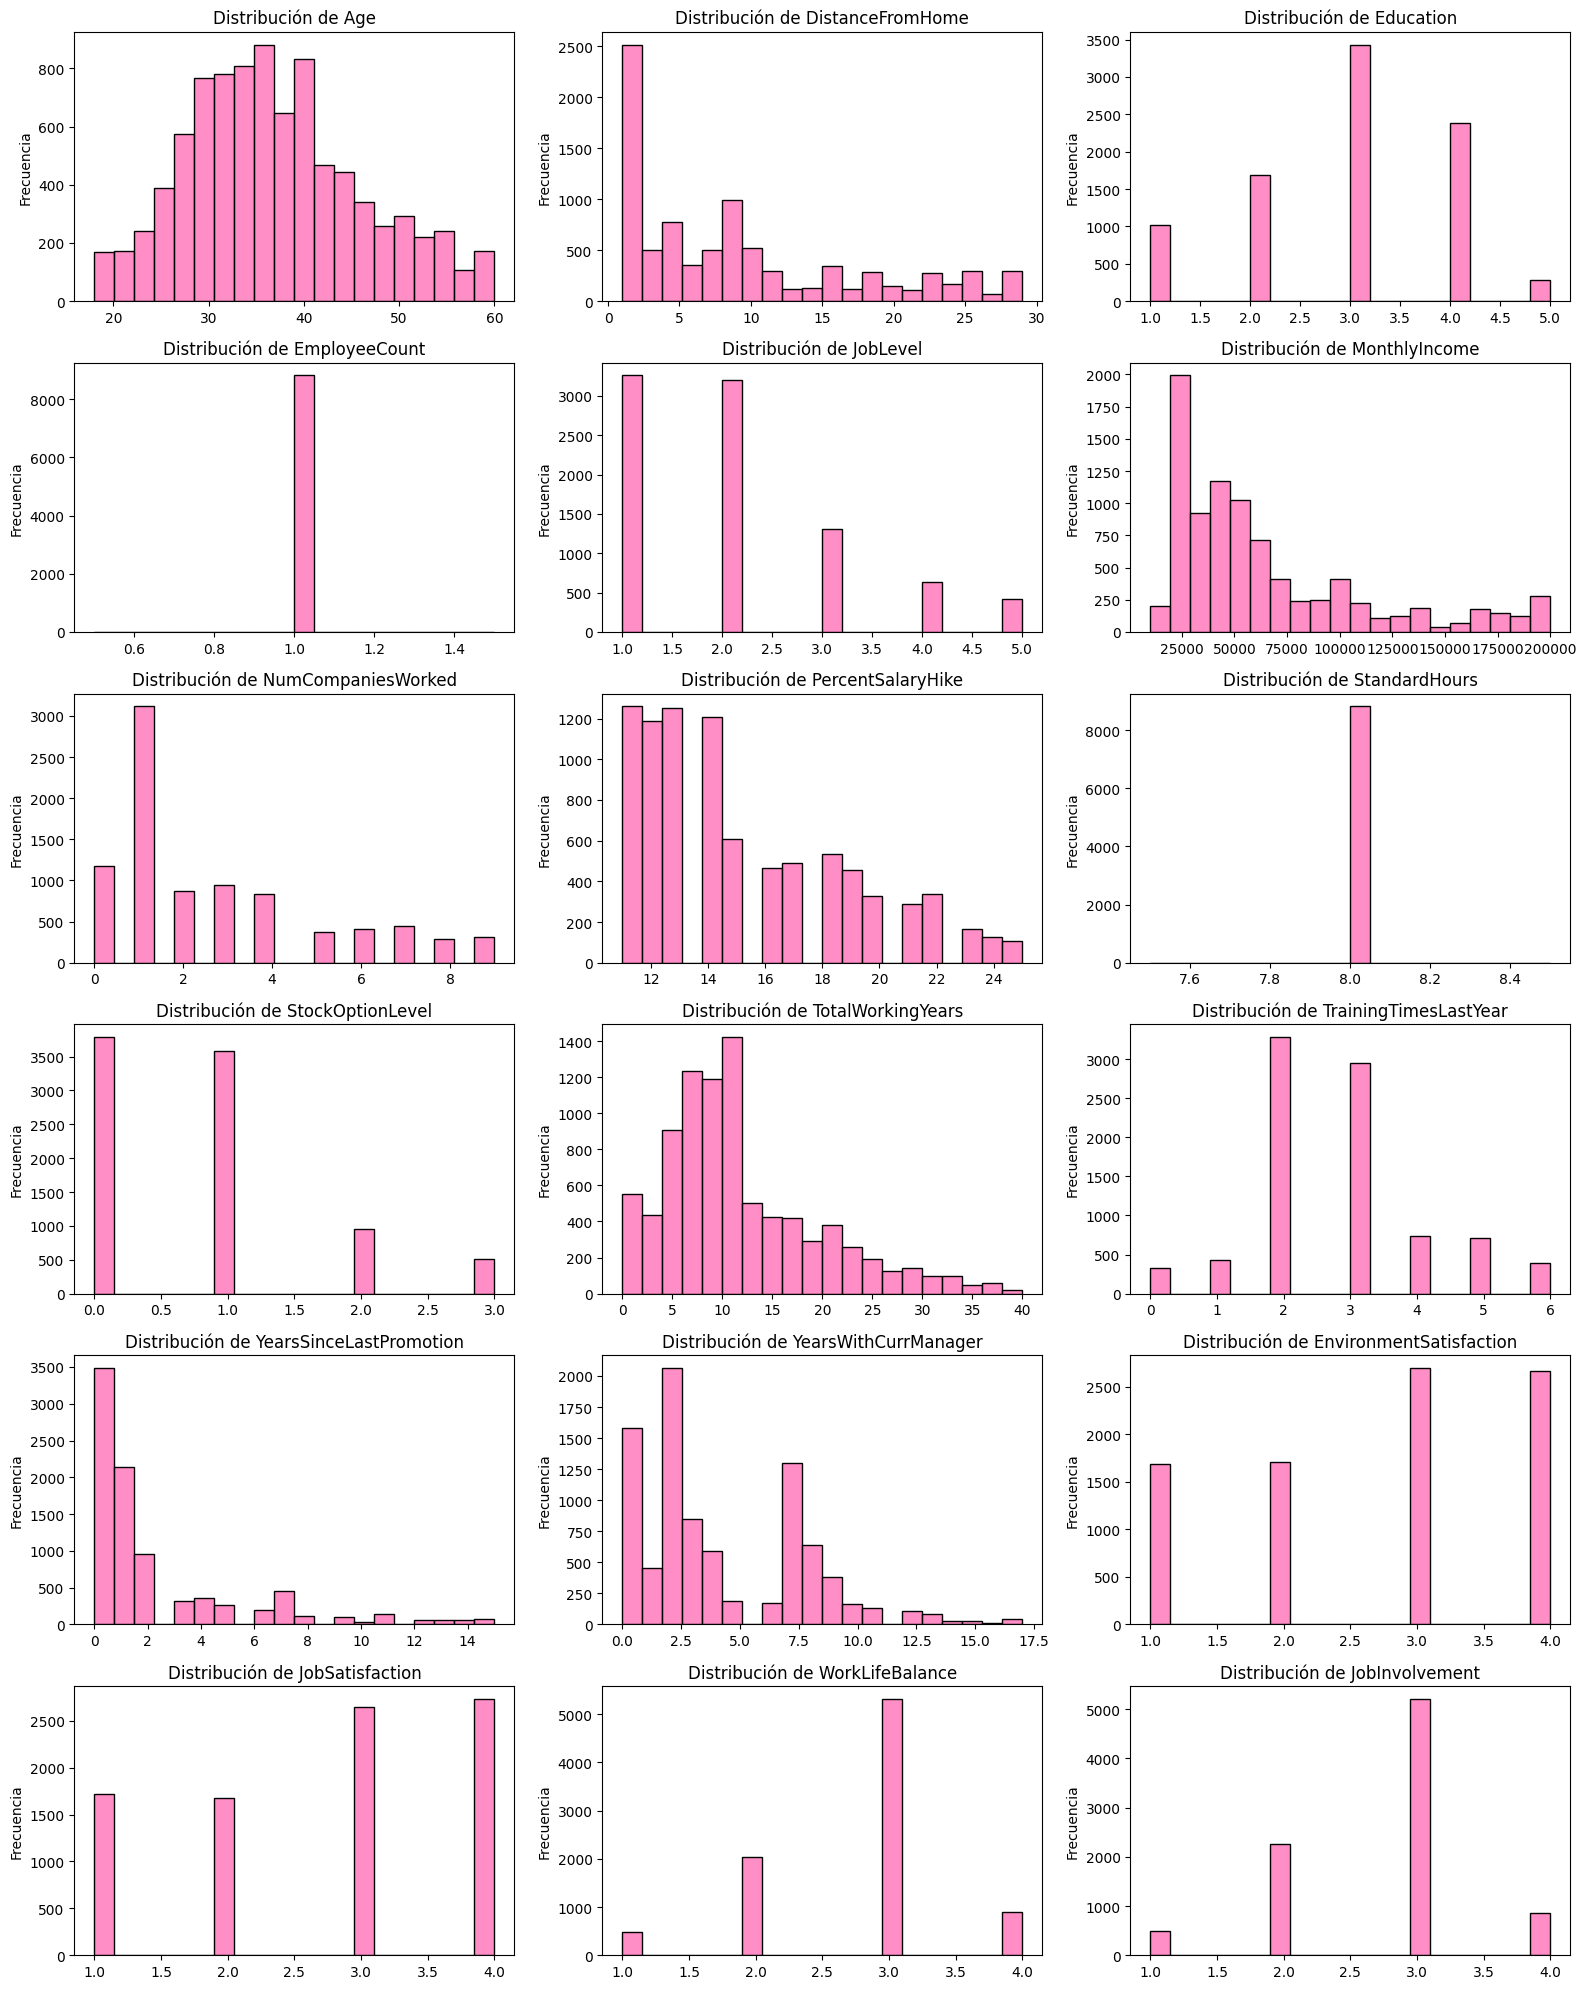

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un esquema de color rosado
color_rosa = "#FF69B4"

# Lista de variables numéricas a graficar
variables = [
    'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobLevel',
    'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
    'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement'
]

# Establecer el tamaño de la figura
plt.figure(figsize=(16, 20))

# Crear un gráfico de distribución (histograma) para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[var], kde=False, color=color_rosa, bins=20)
    plt.title(f'Distribución de {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frecuencia')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()


vemos que hay 2 variables constantes (Standardhours y Employee count), por lo cual se podrían eliminar. 

In [120]:
#Eliminar 'StandardHours', 'EmployeeCount'
df_num.drop(['StandardHours', 'EmployeeCount'], axis=1, inplace=True)
df_num.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

### Variables categóricas

In [122]:
#Definir variables categóricas

df_cat= df1.select_dtypes(include=['object', 'category'])
df_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,AñoEncu
0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y,2015
1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,2015
2,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y,2015
3,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y,2015
4,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y,2015
...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Single,Y,2015
4406,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Divorced,Y,2015
4407,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,2015
4408,Travel_Rarely,Sales,Medical,Male,Laboratory Technician,Divorced,Y,2015


In [123]:
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'AñoEncu'],
      dtype='object')

In [124]:
#correlacion entre variables categóricas y la VO. si el valor P es menor a 0.05, es decir que hay buena correlación
from scipy.stats import chi2_contingency
import pandas as pd

# Lista de las variables categóricas que deseas comparar con la variable objetivo
variables_categoricas = ['BusinessTravel', 'Department', 'EducationField','Gender','JobRole','MaritalStatus','Over18', 'AñoEncu']  # Añade tus variables aquí
variable_objetivo = 'Attrition'

# Iterar sobre las variables categóricas
for var in variables_categoricas:
    # Crea una tabla de contingencia entre la variable categórica y la variable objetivo
    contingency_table = pd.crosstab(df[var], df[variable_objetivo])

    # Realiza el test de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Imprime los resultados para cada variable categórica
    print(f"Variable: {var}")
    print(f"Chi2: {chi2}, P-valor: {p}\n")
    

Variable: BusinessTravel
Chi2: 0.0, P-valor: 1.0

Variable: Department
Chi2: 0.0, P-valor: 1.0

Variable: EducationField
Chi2: 0.0, P-valor: 1.0

Variable: Gender
Chi2: 0.0, P-valor: 1.0

Variable: JobRole
Chi2: 0.0, P-valor: 1.0

Variable: MaritalStatus
Chi2: 0.0, P-valor: 1.0

Variable: Over18
Chi2: 0.0, P-valor: 1.0

Variable: AñoEncu
Chi2: 0.0, P-valor: 1.0



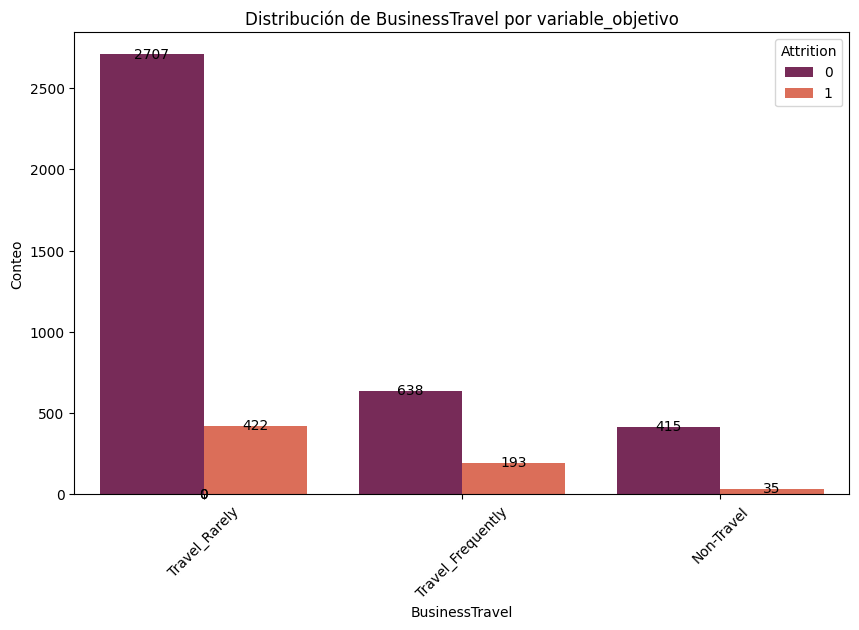

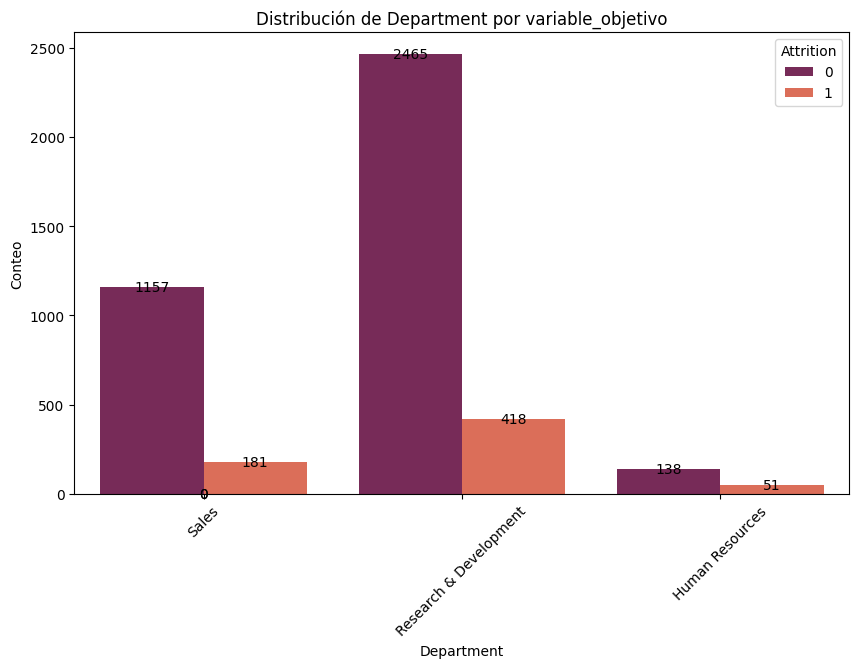

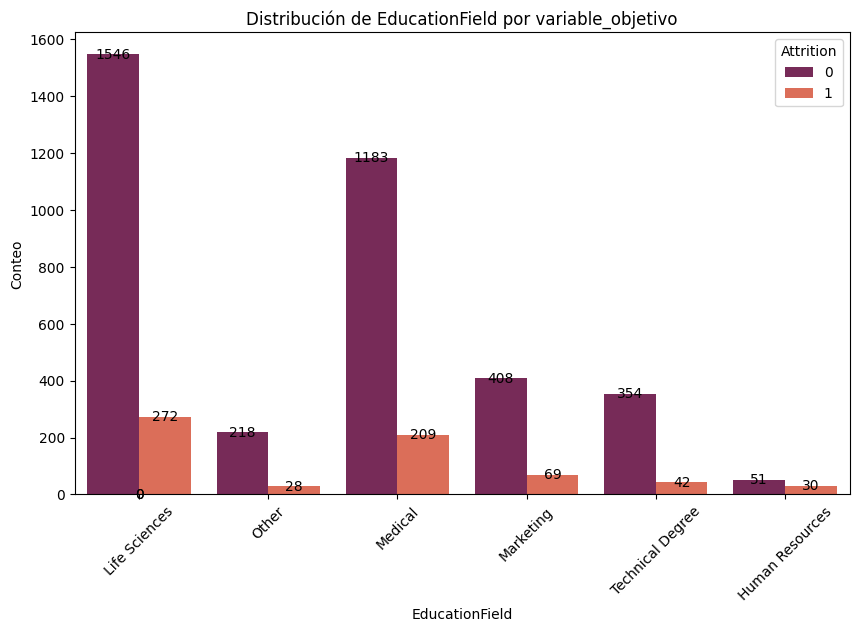

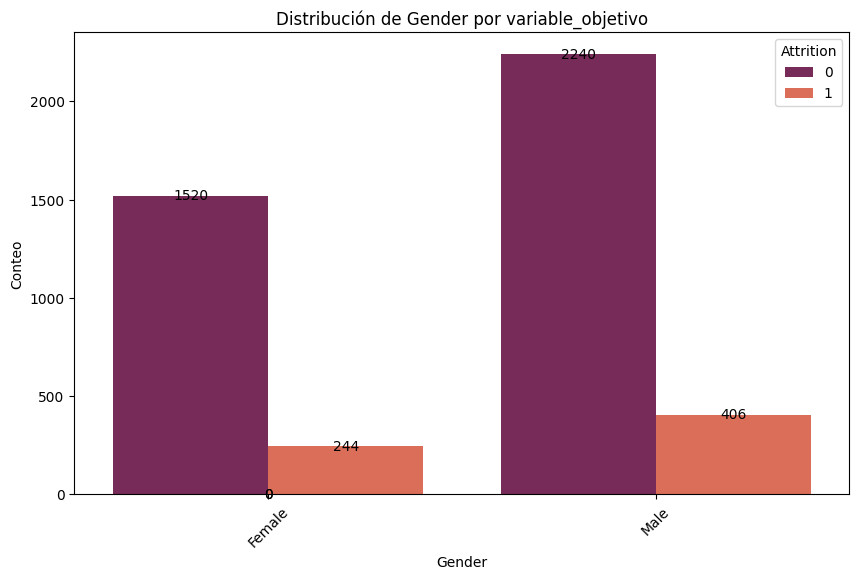

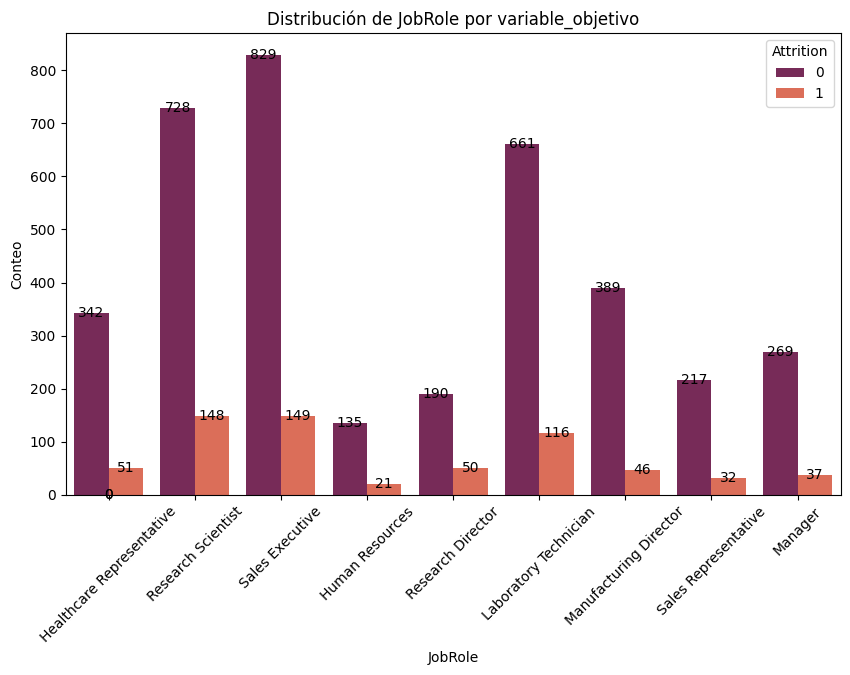

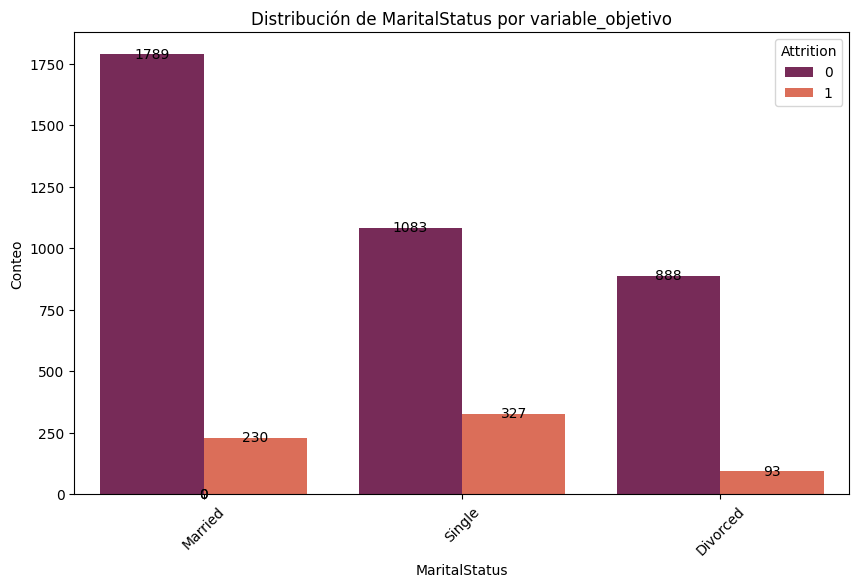

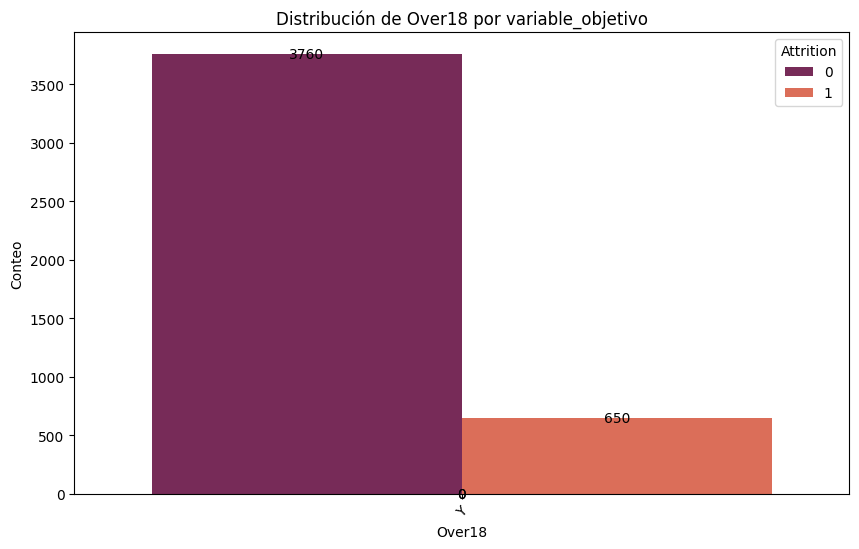

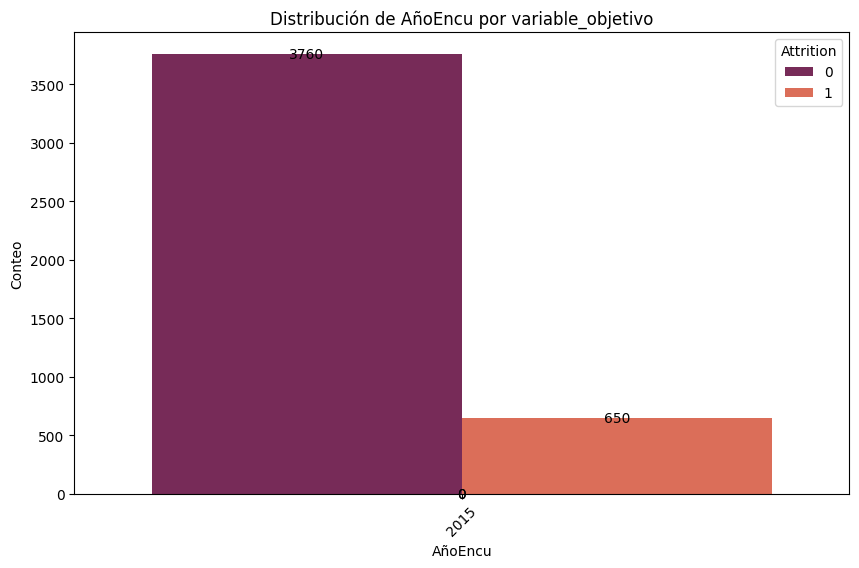

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas a graficar
variables_categoricas = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
    'MaritalStatus', 'Over18', 'AñoEncu'
]

# Crear gráficos individualmente para cada variable categórica
for var in variables_categoricas:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
    ax = sns.countplot(x=var, hue='Attrition', data=df1, palette='rocket')
    
    # Añadir el conteo dentro de las barras
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x() + width / 2
        y = p.get_y() + height
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')
    
    plt.title(f'Distribución de {var} por variable_objetivo')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
    plt.show()




Después de hacer la prueba de chi 2 y mirar la correlación entre las variables ccategóricas y la VO (Attrition), podemos ver que algunas variables no tienen tanta correlacion como por ejemplo Gender,JobRole, Over18 por lo cual podrìan eliminarse.

In [126]:
# Eliminar las columnas especificadas
df_cat.drop(['Gender', 'JobRole', 'Over18'], axis=1, inplace=True)


### Correlación entre variables

In [127]:
# Matriz de Correlación

corrmat = df_num.corr()
corrmat

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
Age,1.000000,0.006963,-0.035706,-0.002386,-0.002884,-0.044314,0.298528,-0.033137,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089,0.010073,-0.003081,-0.021191,0.018196,-0.025563,-0.155881
DistanceFromHome,0.006963,1.000000,-0.008638,-0.007614,-0.037329,-0.021607,-0.013818,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584,0.020109,-0.011119,0.007961,-0.001837,0.036418,-0.003878
Education,-0.035706,-0.008638,1.000000,-0.010243,0.045746,0.006410,-0.016219,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358,-0.045317,-0.004160,-0.006388,-0.018279,-0.035591,-0.013996
EmployeeID,-0.002386,-0.007614,-0.010243,1.000000,-0.005296,0.006990,0.007442,0.004207,-0.024038,-0.016467,-0.015140,-0.011483,-0.006892,-0.010288,-0.006941,-0.003051,-0.009730,0.008913,0.004668,-0.075141
JobLevel,-0.002884,-0.037329,0.045746,-0.005296,1.000000,0.047316,-0.009844,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251,-0.024409,-0.018230,-0.027538,-0.012630,-0.002474,-0.008419
MonthlyIncome,-0.044314,-0.021607,0.006410,0.006990,0.047316,1.000000,-0.020710,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304,-0.005981,0.005055,0.003553,0.023346,0.016093,-0.032891
NumCompaniesWorked,0.298528,-0.013818,-0.016219,0.007442,-0.009844,-0.020710,1.000000,0.030825,0.017130,0.238397,-0.032239,-0.117820,-0.036618,-0.109480,0.012936,-0.055936,-0.008667,0.027921,0.017802,0.035954
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.004207,0.010973,0.004325,0.030825,1.000000,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864,0.000838,0.030756,-0.040409,-0.004658,0.773550,0.026192
StockOptionLevel,-0.031753,0.011169,0.001261,-0.024038,0.000993,0.026930,0.017130,0.012548,1.000000,0.002694,-0.069902,0.007886,0.019063,0.017757,-0.004583,0.039821,-0.022787,0.010295,-0.036348,0.003739
TotalWorkingYears,0.680661,0.009374,-0.010717,-0.016467,-0.036957,-0.033787,0.238397,-0.018736,0.002694,1.000000,-0.040762,0.627703,0.404444,0.458800,-0.002261,-0.016799,0.001114,0.006709,-0.001396,-0.162212


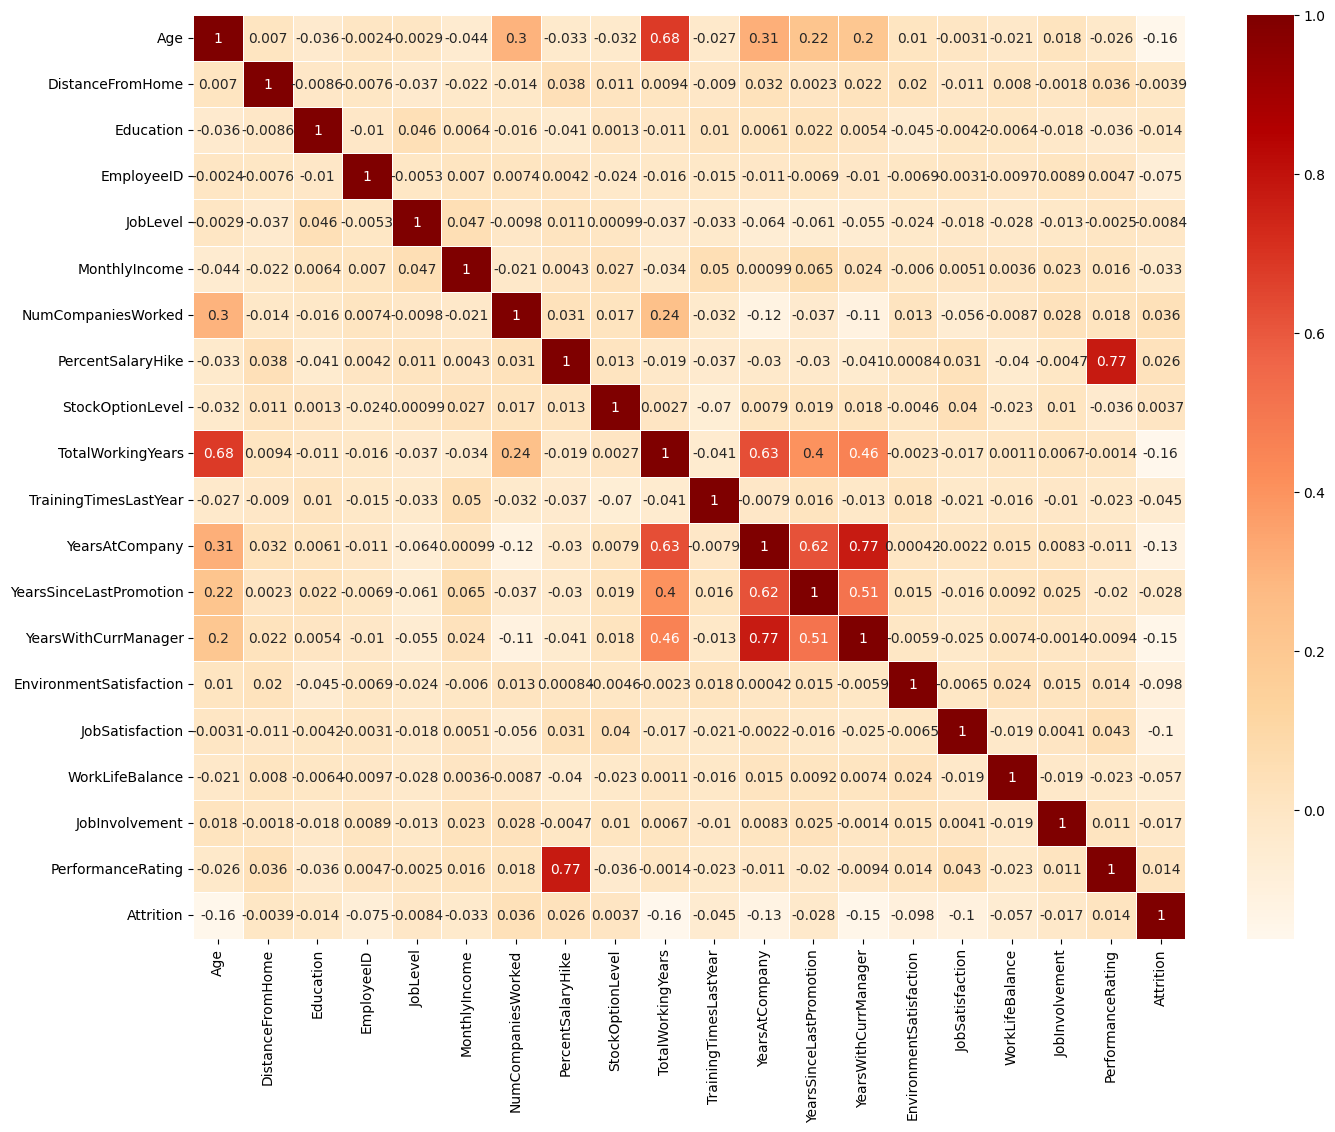

In [128]:
# Heat Map

f, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(corrmat, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

Las variables PerformanceRating y PercentSalaryHike tienen una correlacion alta lo cual podemos decir que brindan informacion general y por tanto una de las dos puede ser eliminada.
Lo mismo pasa con YearwithCurrManager, YearsAtCompany y TotalWorkingYears

In [129]:
#Eliminamos 'PerformanceRating','YearsWithCurrManager', 'YearsAtCompany','TotalWorkingYears'
df_num.drop(['PerformanceRating','YearsWithCurrManager', 'YearsAtCompany','TotalWorkingYears'], axis=1, inplace=True)


In [130]:
#Nuevo Corrmat2
corrmat2 = df_num.corr()

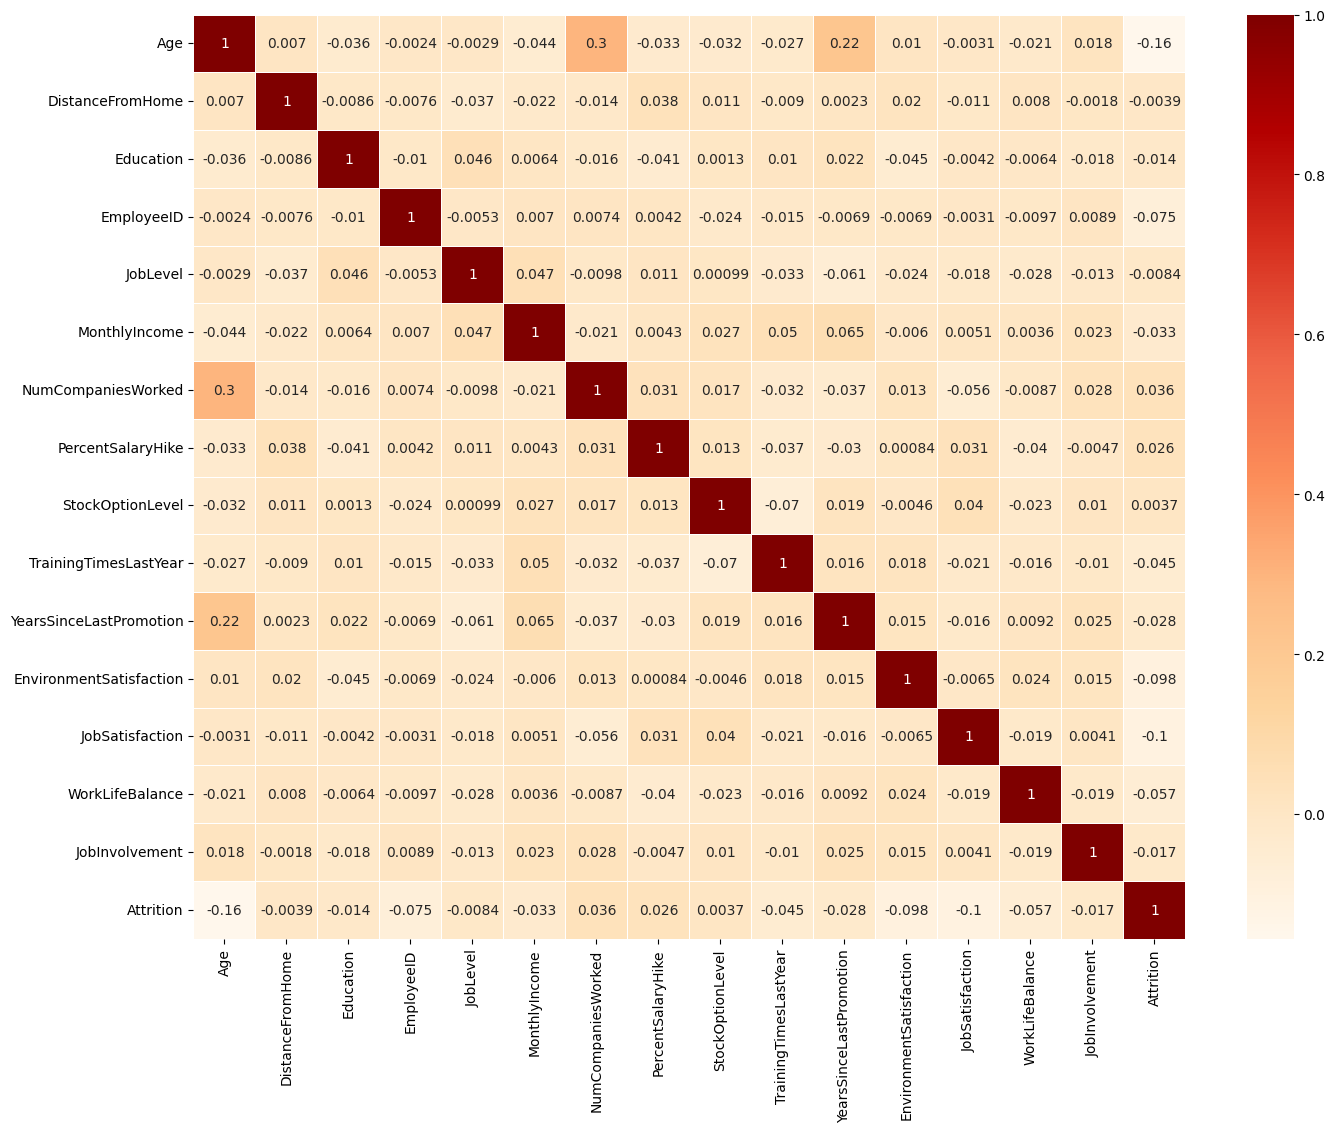

In [131]:
#nuevo heat map
f, ax = plt.subplots(figsize = (16, 12))
sns.heatmap(corrmat2, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

In [132]:
df_num.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'Attrition'],
      dtype='object')

Analisis Bivariado

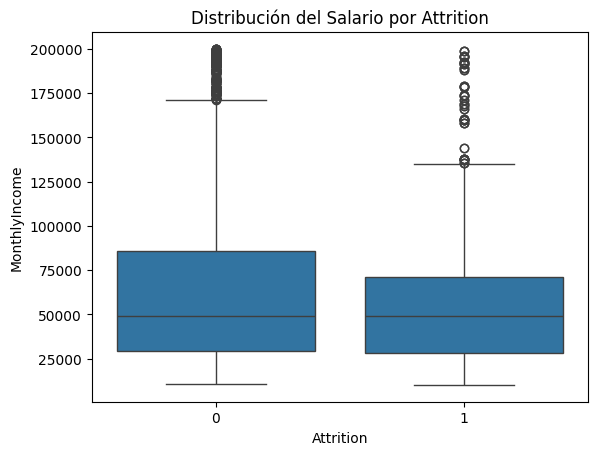

In [133]:
# Boxplot para comparar el salario de los que se fueron y los que se quedaron
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_num)
plt.title('Distribución del Salario por Attrition')
plt.show()

#### convertir categóricas a dummies

In [134]:
# Reemplazar valores faltantes con 0
df_cat = df_cat.fillna(0)



C:\Users\sebas\AppData\Local\Temp\ipykernel_18792\481434439.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat = df_cat.fillna(0)


In [135]:
# pasar variables categóricas a dummies
df_cat_dummies = pd.get_dummies(df_cat)

# Convertir todas las columnas booleanas en el DataFrame resultante a 0 y 1
df_cat_dummies = df_cat_dummies.astype(int)

df_cat_dummies.head(4)

,AñoEncu,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,2015,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
1,2015,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,2015,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3,2015,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [136]:
df_cat_dummies.columns

Index(['AñoEncu', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

### Escalado de variables numéricas

In [137]:
# escalado de varibales numéricas

#from sklearn.preprocessing import MinMaxScaler

# Creamos el objeto del escalador MinMax
#scaler = MinMaxScaler()

# Escalamos las variables numéricas
#df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [138]:
from sklearn.preprocessing import MinMaxScaler

# Excluir la columna 'Attrition' del escalado
df_num_sin_attrition = df_num.drop(columns=['Attrition'])

# Creamos el objeto del escalador MinMax
scaler = MinMaxScaler()

# Escalamos las variables numéricas, excepto 'Attrition'
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_sin_attrition), columns=df_num_sin_attrition.columns)

# Volver a añadir la columna 'Attrition' sin escalar
df_num_scaled['Attrition'] = df_num['Attrition'].values


In [139]:
df_num_scaled.head(4)

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Attrition
0,0.785714,0.178571,0.25,0.000000,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0
1,0.309524,0.321429,0.00,0.000113,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,0.066667,0.666667,0.333333,1.000000,0.333333,1
2,0.333333,0.571429,0.75,0.000227,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.666667,0
3,0.476190,0.035714,1.00,0.000340,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,0.466667,1.000000,1.000000,0.666667,0.333333,0


### Concatenar

In [140]:
# Concatenar los DataFrames df_nums_scaled y df_cats_dummies
df_final = pd.concat([df_num_scaled, df_cat_dummies], axis=1)

In [141]:
df_final

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.785714,0.178571,0.25,0.000000,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,...,1,0,1,0,0,0,0,0,1,0
1,0.309524,0.321429,0.00,0.000113,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,...,0,0,1,0,0,0,0,0,0,1
2,0.333333,0.571429,0.75,0.000227,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,...,0,0,0,0,0,1,0,0,1,0
3,0.476190,0.035714,1.00,0.000340,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,...,0,0,1,0,0,0,0,0,1,0
4,0.333333,0.321429,0.00,0.000454,0.00,0.070195,0.444444,0.071429,0.666667,0.333333,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.571429,0.142857,0.75,0.499887,0.00,0.264350,0.333333,0.428571,0.333333,0.833333,...,0,0,0,0,1,0,0,0,0,1
4406,0.261905,0.035714,0.75,0.500000,0.00,0.087941,0.222222,0.285714,0.000000,0.333333,...,0,0,0,0,1,0,0,1,0,0
4407,0.166667,0.857143,0.25,0.500113,0.25,0.141811,0.000000,0.642857,0.000000,0.666667,...,0,0,1,0,0,0,0,0,1,0
4408,0.571429,0.607143,0.25,0.500227,0.00,0.073144,0.000000,0.214286,0.333333,0.333333,...,1,0,0,0,1,0,0,1,0,0


In [142]:
df_final.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'Attrition', 'AñoEncu', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

Hasta ahora se han aplicado pruebas entre variables categoricas, como Chi-cuadrado, diagrama de correlacion y filtrado

S.V para variables numericas

Correlacion de Pearson

In [143]:
conteo_unos = df_final['Attrition'].sum()
conteo_ceros = len(df_final) - conteo_unos

print("Número de unos en Attrition:", conteo_unos)
print("Número de ceros en Attrition:", conteo_ceros)

Número de unos en Attrition: 650
Número de ceros en Attrition: 3760


In [144]:
#exportar para modelos
df_final.to_csv('df_models.csv', index=False)

In [145]:
print(df_final['AñoEncu'].head)

<bound method NDFrame.head of 0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
4405    2015
4406    2015
4407    2015
4408    2015
4409    2015
Name: AñoEncu, Length: 4410, dtype: int32>
